# OC yealy emissions comparison across data catalogues

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
seconds_in_year = 31536000
area_earth = 5.1006447295*pow(10,14)

In [3]:
specie = 'oc'
specie_title = 'OC'

In [4]:
def make_emission_plottable(file_name, column_name):
    emissions = pd.read_csv(file_name, sep = ',')
    emissions.columns = ['Date', column_name]
    return emissions.set_index(pd.to_datetime(emissions['Date'])).drop(columns = ['Date'])

### SSPs, CMIP6

In [5]:
ssp126_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-'+ specie +'-ssp126-ye.csv'
ssp245_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-'+ specie +'-ssp245-ye.csv'
ssp370_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-'+ specie +'-ssp370-ye.csv'
ssp460_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-'+ specie +'-ssp460-ye.csv'
ssp585_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-'+ specie +'-ssp585-ye.csv'

In [6]:
ssp126_road = make_emission_plottable(ssp126_road_file, 'SSP126')
ssp245_road = make_emission_plottable(ssp245_road_file, 'SSP245')
ssp370_road = make_emission_plottable(ssp370_road_file, 'SSP370')
ssp460_road = make_emission_plottable(ssp460_road_file, 'SSP460')
ssp585_road = make_emission_plottable(ssp585_road_file, 'SSP585')

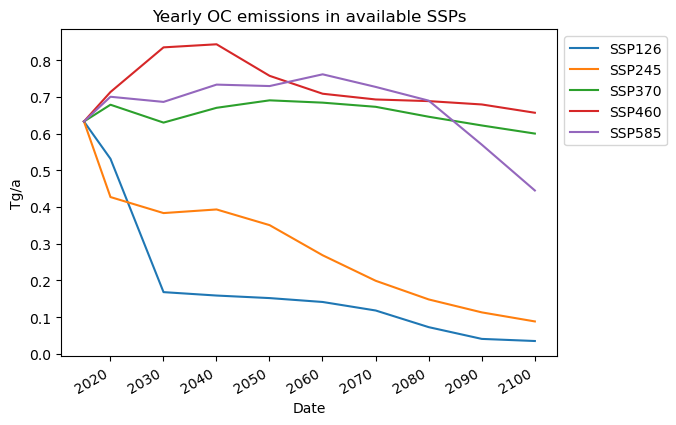

In [7]:
ax = ssp126_road.plot()
ssp245_road.plot(ax=ax)
ssp370_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions in available SSPs')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

### Historical

In [8]:
hist_emissions_file = '/work/bd1063/b309253/emissions/hist_road_'+ specie +'.csv'
hist_emissions = make_emission_plottable(hist_emissions_file, 'CMIP6v6')

Text(0, 0.5, 'Tg/a')

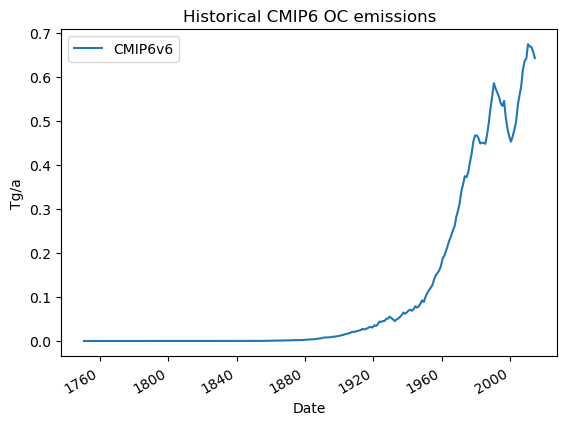

In [9]:
ax = hist_emissions.plot()

ax.set_title('Historical CMIP6 '+specie_title+' emissions')
ax.set_ylabel('Tg/a')

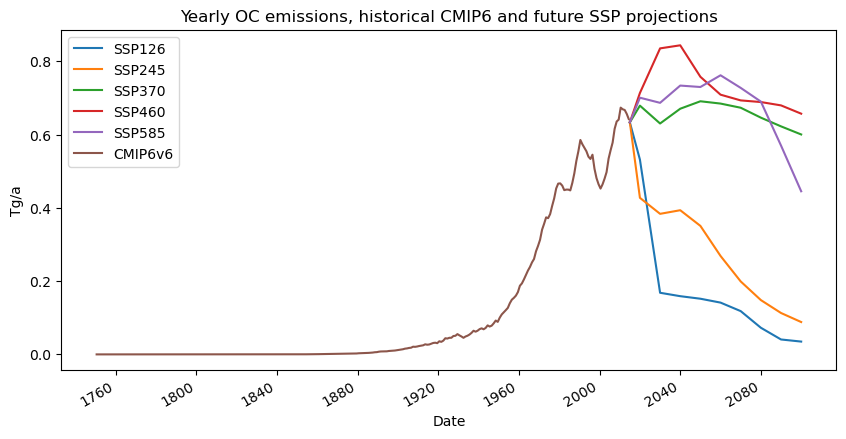

In [32]:
ax = ssp126_road.plot(figsize=(10, 5))
ssp245_road.plot(ax=ax)
ssp370_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)

hist_emissions.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions, historical CMIP6 and future SSP projections')
ax.set_ylabel('Tg/a')

plt.savefig('./plots/OC_cmip6_ssps.pdf')

Text(0, 0.5, 'Tg/a')

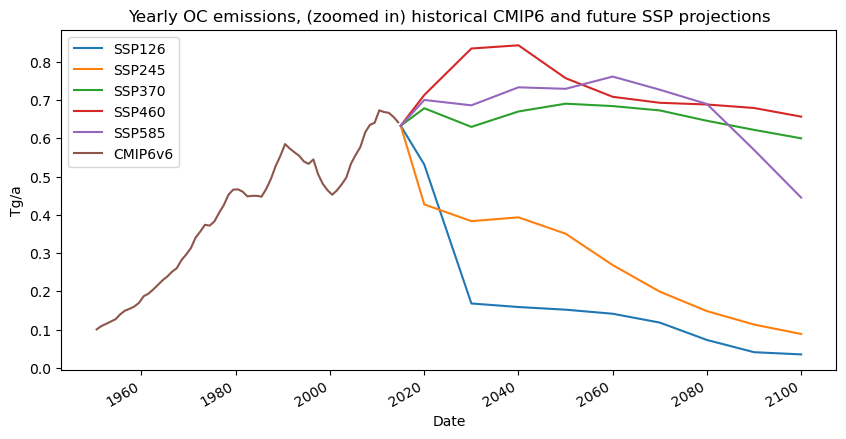

In [11]:
ax = ssp126_road.plot(figsize=(10, 5))
ssp245_road.plot(ax=ax)
ssp370_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)
hist_emissions[200:].plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions, (zoomed in) historical CMIP6 and future SSP projections')
ax.set_ylabel('Tg/a')

# Adding all catalogues

### CAMS v5.3

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

In [12]:
cams_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-'+ specie +'.csv'

In [13]:
cams = pd.read_csv(cams_file, sep = ',')
cams.columns =  ['Date', 'CAMS Off Road transportation', 'CAMS Road transportation']
cams = cams.set_index(pd.to_datetime(cams['Date'])).drop(columns = ['Date'])

In [14]:
cams['CAMS Land Transport'] = cams['CAMS Off Road transportation'] + cams['CAMS Road transportation']
cams[:3]

CAMS Off Road transportation  CAMS Road transportation   
Date                                                                 
2000-01-01                      0.025723                  0.428182  \
2001-01-01                      0.025843                  0.414627   
2002-01-01                      0.026769                  0.405903   

            CAMS Land Transport  
Date                             
2000-01-01             0.453905  
2001-01-01             0.440470  
2002-01-01             0.432672

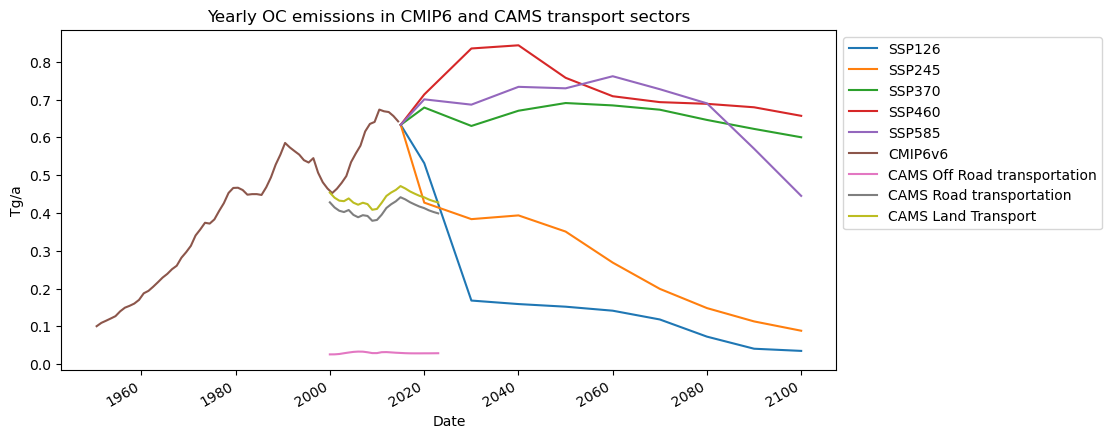

In [33]:
ax = ssp126_road.plot(figsize=(10, 5))
ssp245_road.plot(ax=ax)
ssp370_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)
hist_emissions[200:].plot(ax=ax)
cams.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions in CMIP6 and CAMS transport sectors')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_cams_ssps.pdf')

### CEDS

In [16]:
ceds_file = '/work/bd1063/b309253/emissions/ceds-anthro-'+ specie +'-yearly.csv'
ceds = make_emission_plottable(ceds_file, 'CEDS Transportation')

In [17]:
# Annual Total Anthropogenic Emissions prepared for input4CMIP from CEDS_GBD-MAPS
ceds_input4cmip_path = '/work/bd1063/b309253/emissions/ceds_input4cmip_'+ specie +'.csv'
ceds_input4cmip = make_emission_plottable(ceds_input4cmip_path, 'CEDS input4cmip Transportation')

In [18]:
# Mystery experiment
ceds_v1_path = '/work/bd1063/b309253/emissions/ceds_v1_'+ specie +'.csv'
ceds_v1 = make_emission_plottable(ceds_v1_path, 'CEDS v1 Transportation')

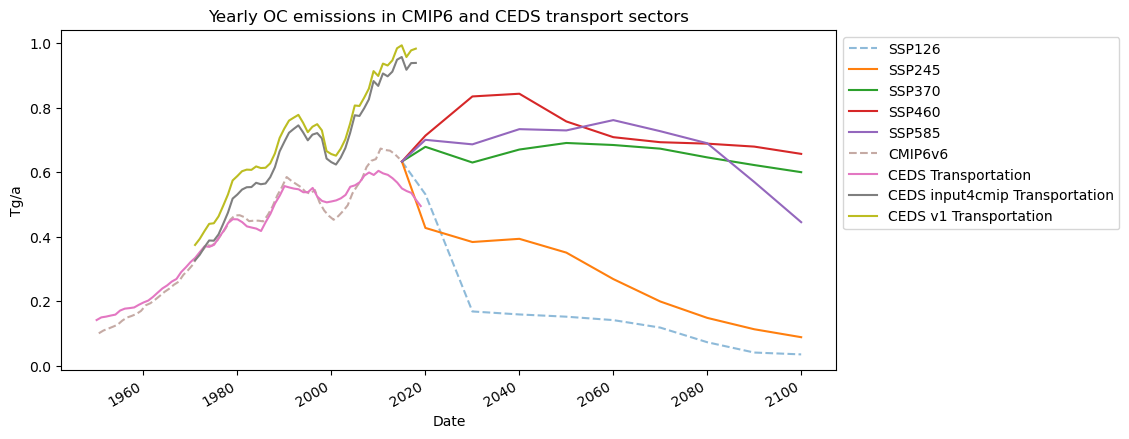

In [34]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
ssp245_road.plot(ax=ax)
ssp370_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)
hist_emissions[200:].plot(ax=ax, linestyle='dashed', alpha = 0.5)
ceds.plot(ax=ax)
ceds_input4cmip.plot(ax=ax)
ceds_v1.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions in CMIP6 and CEDS transport sectors')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_ceds_ssps.pdf')

### ECLISPE

In [20]:
eclipse6_cle_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-'+ specie +'-cle.csv'
eclipse5_cle_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-'+ specie +'.csv'
eclipse5_cle2degrees_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-'+ specie +'.csv'
eclipse5_mfr_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-'+ specie +'.csv'
eclipse5_slcp_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-'+ specie +'.csv'

In [21]:
eclipse6_cle = make_emission_plottable(eclipse6_cle_file, 'ECLIPSE V6  CLE Transportation')
eclipse5_cle = make_emission_plottable(eclipse5_cle_file, 'ECLIPSE V5 CLE Transportation')
eclipse5_cle2degrees = make_emission_plottable(eclipse5_cle2degrees_file, 'ECLIPSE CLE 2^{o} Transportation')
eclipse5_mfr = make_emission_plottable(eclipse5_mfr_file, 'ECLIPSE V5 MFR Transportation')
eclipse5_slcp = make_emission_plottable(eclipse5_slcp_file, 'ECLIPSE V5 SLCP Transportation')

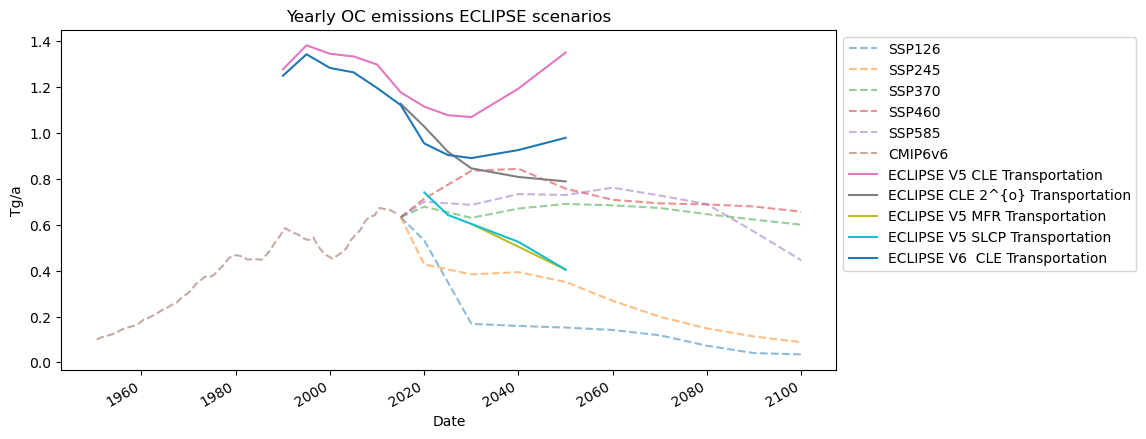

In [35]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
ssp245_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp370_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
eclipse5_cle.plot(ax=ax)
eclipse5_cle2degrees.plot(ax=ax)
eclipse5_mfr.plot(ax=ax)
eclipse5_slcp.plot(ax=ax)
eclipse6_cle.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions ECLIPSE scenarios')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_eclipse_ssps.pdf')

### EDGAR

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

**Transport** contains emissions from the combustion of fuel for all transport activity, regardless of the sector, except for international marine bunkers and international aviation bunkers, which are not included in transport emissions at a national or regional level (except for World transport emissions). This includes domestic aviation, domestic navigation, road, rail and pipeline transport, and corresponds to IPCC Source/ Sink Category 1 A 3. The IEA data are not collected in a way that allows the autoproducer consumption to be split by specific end-use and therefore, this publication shows autoproducers as a separate item.
The procedures given for calculating emissions ensure that emissions from the use of fuels for international marine and air transport are excluded from national emissions totals.


**Road** contains the emissions arising from fuel use in road vehicles, including the use of agricultural vehicles on highways. This corresponds to the IPCC Source/Sink Category 1 A 3 b

In [23]:
edgar6_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-'+ specie +'-yearly.csv'
edgar6 = pd.read_csv(edgar6_file, sep = ',')
edgar6[:3]

Date   Non-road ground transportation   
0  1970-01-01 00:00:00                         0.079680  \
1  1971-01-01 00:00:00                         0.078909   
2  1972-01-01 00:00:00                         0.079047   

    Road transportation no resuspension  
0                              0.106352  
1                              0.112354  
2                              0.123918

In [24]:
edgar6.columns =  ['Date', 'EDGAR V6 Non-road ground transportation', 'EDGAR V6 Road transportation no resuspension']
edgar6 = edgar6.set_index(pd.to_datetime(edgar6['Date'])).drop(columns = ['Date'])

In [25]:
edgar6['EDGAR V6 Land Transport'] = edgar6['EDGAR V6 Non-road ground transportation'] + edgar6['EDGAR V6 Road transportation no resuspension']
edgar6[:3]

EDGAR V6 Non-road ground transportation   
Date                                                  
1970-01-01                                 0.079680  \
1971-01-01                                 0.078909   
1972-01-01                                 0.079047   

            EDGAR V6 Road transportation no resuspension   
Date                                                       
1970-01-01                                      0.106352  \
1971-01-01                                      0.112354   
1972-01-01                                      0.123918   

            EDGAR V6 Land Transport  
Date                                 
1970-01-01                 0.186032  
1971-01-01                 0.191263  
1972-01-01                 0.202965

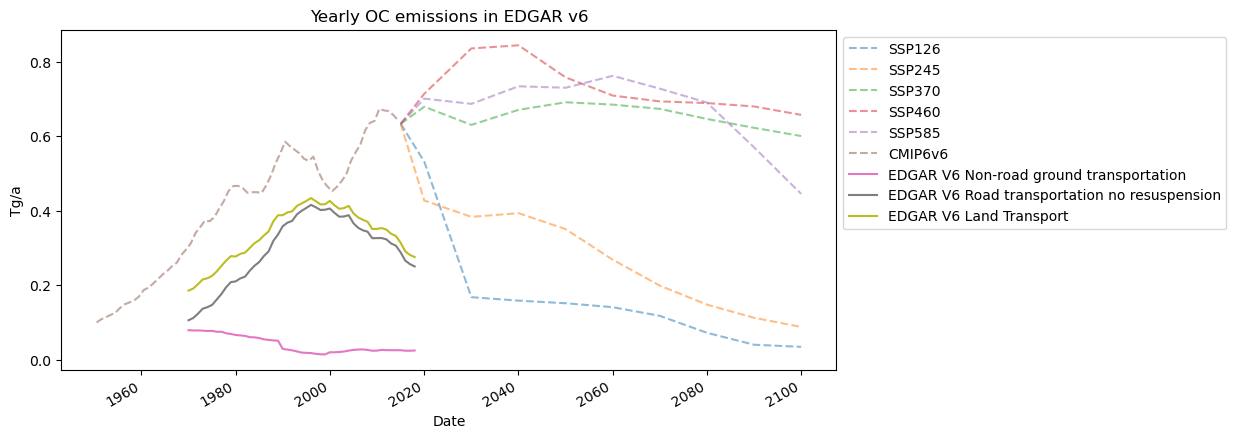

In [37]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
ssp245_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp370_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
edgar6.plot(ax=ax)

ax.set_title('Yearly '+specie_title+' emissions in EDGAR v6')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_edgar6_ssps.pdf')

In [27]:
edgar4_file = '/work/bd1063/b309253/emissions/edgarv432-anthro-'+specie+'-year.csv'
edgar4 = pd.read_csv(edgar4_file, sep = ',')
edgar4.columns =  ['Date', 'EDGAR V4 Non-road ground transportation', 'EDGAR V4 Road transportation no resuspension']
edgar4 = edgar4.set_index(pd.to_datetime(edgar4['Date'])).drop(columns = ['Date'])
edgar4['EDGAR V4 Land Transport'] = edgar4['EDGAR V4 Non-road ground transportation'] + edgar4['EDGAR V4 Road transportation no resuspension']

In [28]:
edgar5_file = '/work/bd1063/b309253/emissions/edgarv5-anthro-'+specie+'-yearly.csv'
edgar5 = pd.read_csv(edgar5_file, sep = ',')
edgar5.columns =  ['Date', 'EDGAR V5 Non-road ground transportation', 'EDGAR V5 Road transportation no resuspension']
edgar5 = edgar5.set_index(pd.to_datetime(edgar5['Date'])).drop(columns = ['Date'])
edgar5['EDGAR V5 Land Transport'] = edgar5['EDGAR V5 Non-road ground transportation'] + edgar5['EDGAR V5 Road transportation no resuspension']

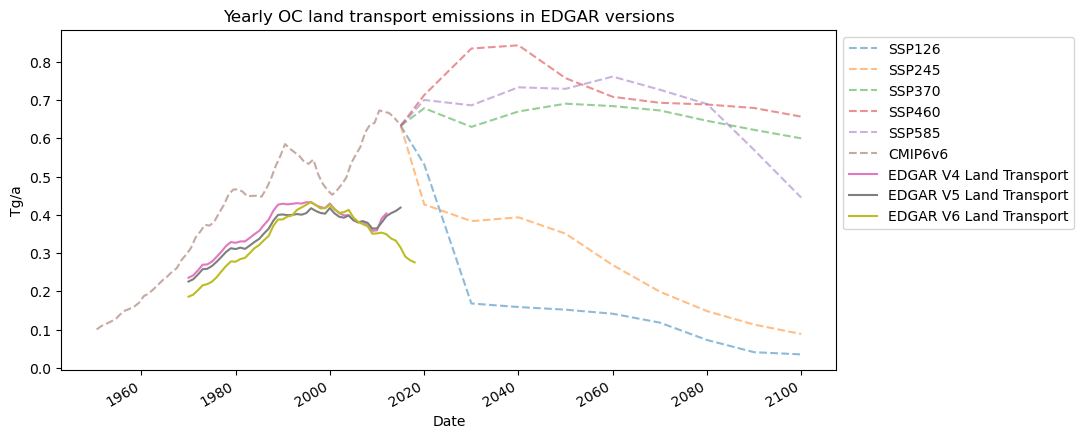

In [38]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
ssp245_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp370_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
edgar4['EDGAR V4 Land Transport'].plot(ax=ax)
edgar5['EDGAR V5 Land Transport'].plot(ax=ax)
edgar6['EDGAR V6 Land Transport'].plot(ax=ax)

ax.set_title('Yearly '+specie_title+' land transport emissions in EDGAR versions')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_edgars_ssps.pdf')

# All together

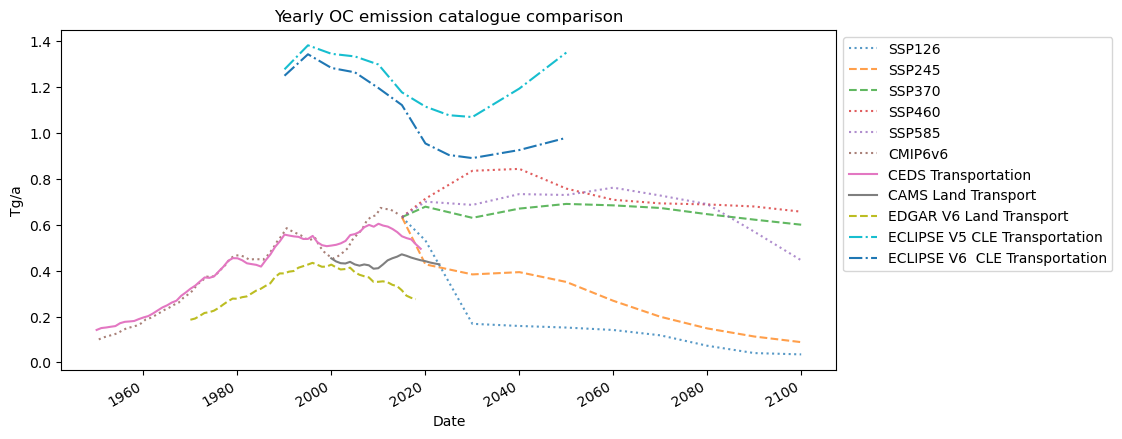

In [39]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dotted', alpha = 0.75)
ssp245_road.plot(ax=ax, linestyle='dashed', alpha = 0.75)
ssp370_road.plot(ax=ax, linestyle='dashed', alpha = 0.75)
ssp460_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp585_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
hist_emissions[200:].plot(ax=ax, linestyle='dotted', alpha = 0.75)
ceds.plot(ax=ax)
#ceds_input4cmip.plot(ax=ax)
#ceds_v1.plot(ax=ax)
cams['CAMS Land Transport'].plot(ax=ax)
#edgar4['EDGAR V4 Land Transport'].plot(ax=ax, linestyle='dashed')
#edgar5['EDGAR V5 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar6['EDGAR V6 Land Transport'].plot(ax=ax, linestyle='dashed')
eclipse5_cle.plot(ax=ax, linestyle='dashdot')
#eclipse5_cle2degrees.plot(ax=ax, linestyle='dashdot')
#eclipse5_mfr.plot(ax=ax, linestyle='dashdot')
#eclipse5_slcp.plot(ax=ax, linestyle='dashdot')
eclipse6_cle.plot(ax=ax, linestyle='dashdot')

ax.set_title('Yearly '+specie_title+' emission catalogue comparison')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/OC_all.pdf')

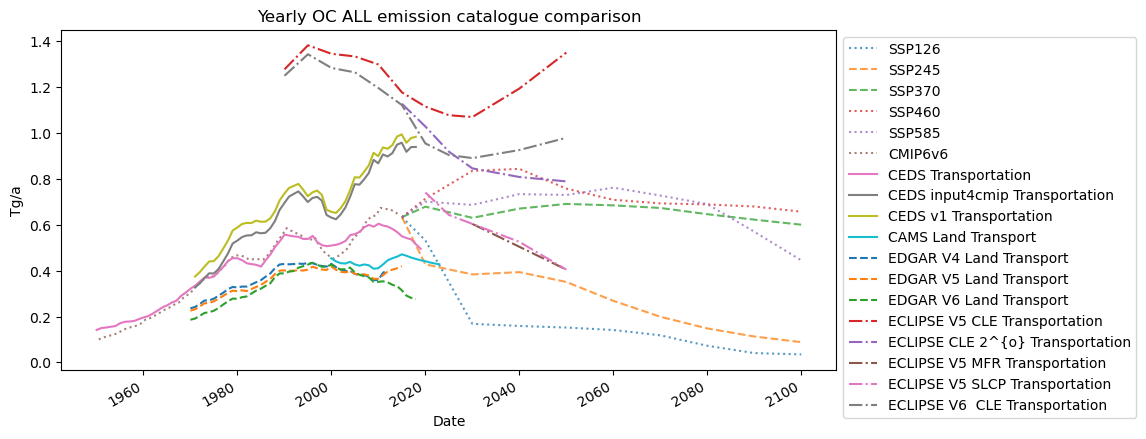

In [31]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dotted', alpha = 0.75)
ssp245_road.plot(ax=ax, linestyle='dashed', alpha = 0.75)
ssp370_road.plot(ax=ax, linestyle='dashed', alpha = 0.75)
ssp460_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp585_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
hist_emissions[200:].plot(ax=ax, linestyle='dotted', alpha = 0.75)
ceds.plot(ax=ax)
ceds_input4cmip.plot(ax=ax)
ceds_v1.plot(ax=ax)
cams['CAMS Land Transport'].plot(ax=ax)
edgar4['EDGAR V4 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar5['EDGAR V5 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar6['EDGAR V6 Land Transport'].plot(ax=ax, linestyle='dashed')
eclipse5_cle.plot(ax=ax, linestyle='dashdot')
eclipse5_cle2degrees.plot(ax=ax, linestyle='dashdot')
eclipse5_mfr.plot(ax=ax, linestyle='dashdot')
eclipse5_slcp.plot(ax=ax, linestyle='dashdot')
eclipse6_cle.plot(ax=ax, linestyle='dashdot')

ax.set_title('Yearly '+specie_title+' ALL emission catalogue comparison')
ax.set_ylabel('Tg/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

### Sectors definitions

**SSP & CMIP6 transport**: 

Transportation sector for CMIP6 is the sum of **Road transportation** (proxy data source from EDGAR v4.3.2 ROAD)
and **Non-road transportation** (EDGAR v4.2 NRTR)

**CEDS Transportation**

Since it's the set of emissions prepared for CMIP6, the definition of the sectors are the same

**CAMS Land Transport**

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

**EDGAR Transportation**

To get land transport in EDGAR, we sum the sub-sectors: **Non-road ground transportation** and **Road transportation no resuspension**

**Transport** contains emissions from the combustion of fuel for all transport activity, regardless of the sector, except for international marine bunkers and international aviation bunkers, which are not included in transport emissions at a national or regional level (except for World transport emissions). This includes domestic aviation, domestic navigation, road, rail and pipeline transport, and corresponds to IPCC Source/ Sink Category 1 A 3. The IEA data are not collected in a way that allows the autoproducer consumption to be split by specific end-use and therefore, this publication shows autoproducers as a separate item.
The procedures given for calculating emissions ensure that emissions from the use of fuels for international marine and air transport are excluded from national emissions totals.


**Road** contains the emissions arising from fuel use in road vehicles, including the use of agricultural vehicles on highways. This corresponds to the IPCC Source/Sink Category 1 A 3 b

**ECLIPSE Transportation**

**CLE** (Current legislation for air pollutants)

**MFR** (Maximum technically feasible reductions)

**CLE-2°** (Climate scenario (2 degrees, CLE))

**SLCP** (Short lived climate pollutants mitigation)

Definition of **Transport** sector is consistent with CMIP6, EDGAR